<a href="https://colab.research.google.com/github/swilsonmfc/nlp/blob/master/ContextualTopicModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contextual Topic Models

# Install

In [1]:
!pip install bertopic
!pip install top2vec

     |████████████████████████████████| 57 kB 3.1 MB/s 
     |████████████████████████████████| 86 kB 4.2 MB/s 
     |████████████████████████████████| 78 kB 8.3 MB/s 
     |████████████████████████████████| 15.7 MB 46.4 MB/s 
     |████████████████████████████████| 5.2 MB 58.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 3.5 MB 45.7 MB/s 
     |████████████████████████████████| 6.8 MB 53.2 MB/s 
     |████████████████████████████████| 1.2 MB 63.2 MB/s 
     |████████████████████████████████| 67 kB 6.6 MB/s 
     |████████████████████████████████| 636 kB 41.1 MB/s 
     |████████████████████████████████| 895 kB 48.6 MB/s 
     |████████████████████████████████| 1.1 MB 69.2 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2327683 sha256=b0499718030e834c162c06cbc824dd2285b84f0a929ab940f383922b908f4295
  Stored in directo

# Setup

In [1]:
from bertopic import BERTopic
from top2vec import Top2Vec
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.datasets import fetch_20newsgroups

# Data

In [8]:
ng_docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']

In [3]:
print(ng_docs[0])

I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


In [9]:
docs = ng_docs
print(len(docs))

18846


# LDA / LSA

## Limitations of LDA / LSA
* Text requires pre-processing
  * Lemmatization
  * Remove stopwords
  * Remove punctuation
* Remove words that are less relevant
  * Proper nouns
* Generative models are a mismatch
* Difficult to objectively evaluate
  

# Resources
* Sia (2020) - Tired of Topic Models?  Clusters of Pre-Trained Word Embeddings Make for Fast and Good Topics too!
  * https://arxiv.org/abs/2004.14914
* Thompson & Mimno (2020) - Topic Modeling with Contextualized Word Representation Clusters
  * https://arxiv.org/abs/2010.12626
* Pre-trained word embeddings approach
  * Gather Embeddings
  * Cluster Embeddings
  * Extract Topics
  * Use PCA to improve speed


# Top2Vec
* https://github.com/ddangelov/Top2Vec
* Positives
  * Finds best number of topics automatically
  * Does not require removing stopwords
  * Does not require lemmatization or stemming
* Algorithm
  * Create a joint embedding of document and word documents
    * Doc2Vec, Universal Sentence Encode, sBERT
  * Reduce the dimensionality of the space using UMAP
  * Find clusters with HDBSCAN 
  * Compute the centroid of the document vectors in the original space
  * Find n-closest word to the topic vector
* Notes:
  * Stopwords - Because they appear in many different topics, they're rarely found near the centroid of a topic
  * UMAP - more stable and reliable than tSNE (Adopt it!)
  * HDBSCAN - Labels points as noise or cluster
  * Supports Search by Topic & Document & Keyword
* Tuning 
  * With large datasets or unique vocabularies Doc2Vec can produce better results
  * Pre-trained models are available:
    * Universal Sentence Encoder
    * Universal Sentence Encoder Multi-Lingual
    * Distiluse Base Multi-Lingual Cased 

## Top2Vec Diagrams
* Source (https://github.com/ddangelov/Top2Vec)

![](https://raw.githubusercontent.com/ddangelov/Top2Vec/master/images/doc_word_embedding.svg?sanitize=true)

![](https://raw.githubusercontent.com/ddangelov/Top2Vec/master/images/umap_docs.png)

![](https://raw.githubusercontent.com/ddangelov/Top2Vec/master/images/hdbscan_docs.png)

![](https://raw.githubusercontent.com/ddangelov/Top2Vec/master/images/topic_vector.svg?sanitize=true)

![](https://raw.githubusercontent.com/ddangelov/Top2Vec/master/images/topic_words.svg?sanitize=true)

## Fit

In [10]:
%%time
top2vec_model = Top2Vec(docs)

2022-02-09 21:15:40,668 - top2vec - INFO - Pre-processing documents for training
2022-02-09 21:15:49,153 - top2vec - INFO - Creating joint document/word embedding
2022-02-09 21:25:25,981 - top2vec - INFO - Creating lower dimension embedding of documents
2022-02-09 21:25:46,167 - top2vec - INFO - Finding dense areas of documents
2022-02-09 21:25:48,623 - top2vec - INFO - Finding topics


In [11]:
top2vec_model.get_num_topics()

109

In [12]:
topic_sizes, topic_nums = top2vec_model.get_topic_sizes()
print(topic_sizes)

[1428 1030  761  595  589  570  493  484  455  363  352  330  325  306
  289  286  274  274  273  262  250  232  222  208  206  204  203  202
  201  187  182  179  172  169  166  166  159  156  153  142  137  136
  129  129  126  119  119  115  112  111  109  109  108  107  104  102
  101  100   98   97   93   90   88   87   86   85   85   85   83   82
   80   80   76   75   73   73   72   69   67   67   65   62   60   59
   59   59   58   58   57   55   54   54   54   53   52   51   50   50
   49   49   49   48   46   44   43   42   37   36   31]


In [13]:
topic_words, word_scores, topic_nums = top2vec_model.get_topics(0)
topic_words, word_scores, topic_nums

(array([], shape=(0, 50), dtype='<U15'),
 array([], shape=(0, 50), dtype=float32),
 array([], dtype=float64))

## Visualize

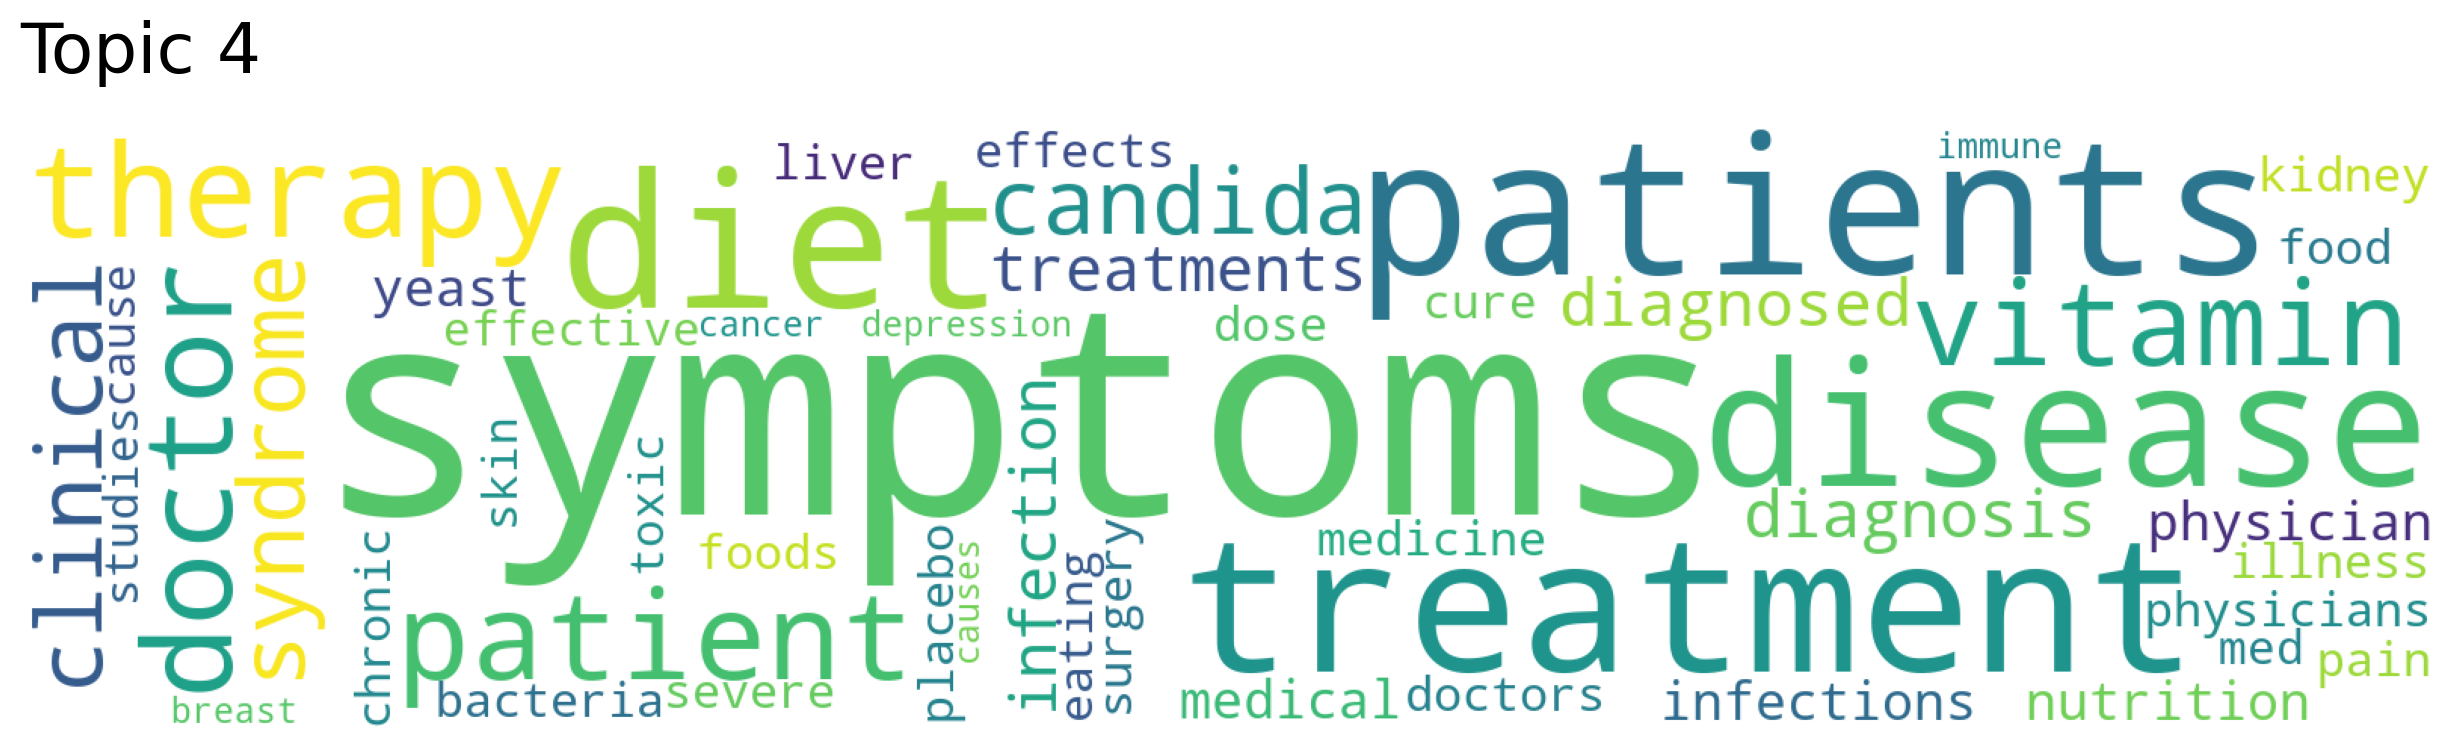

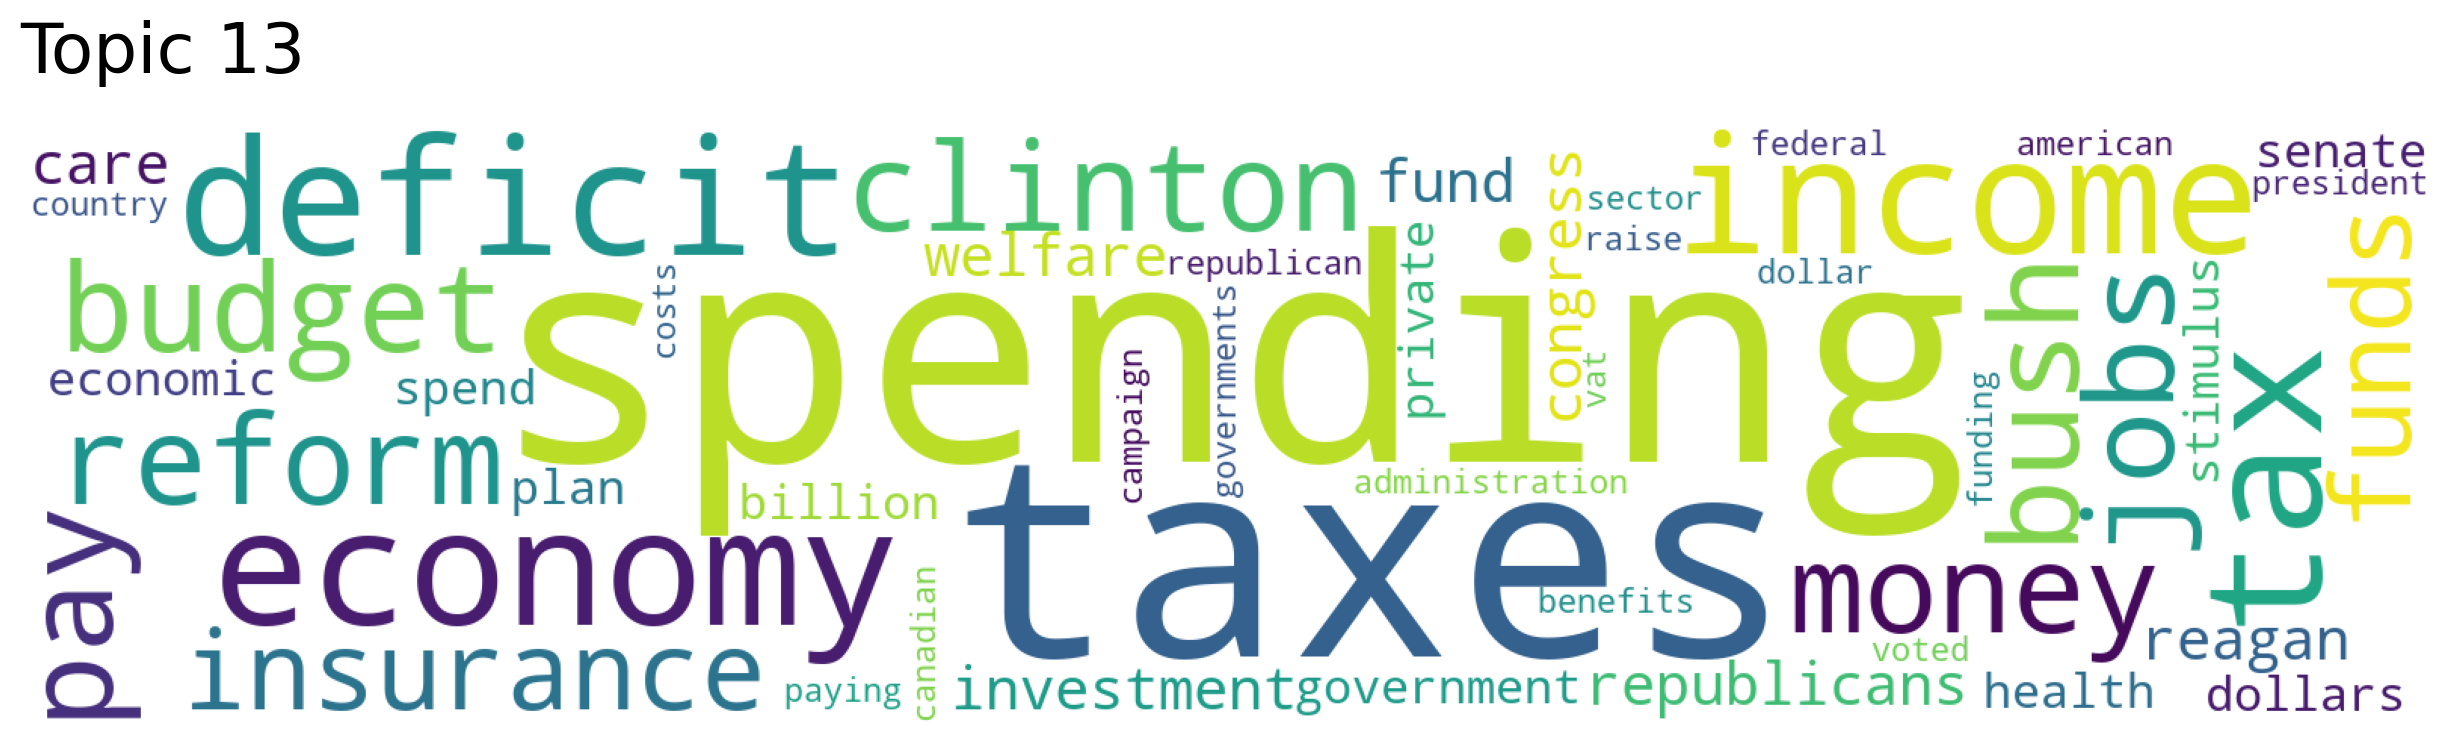

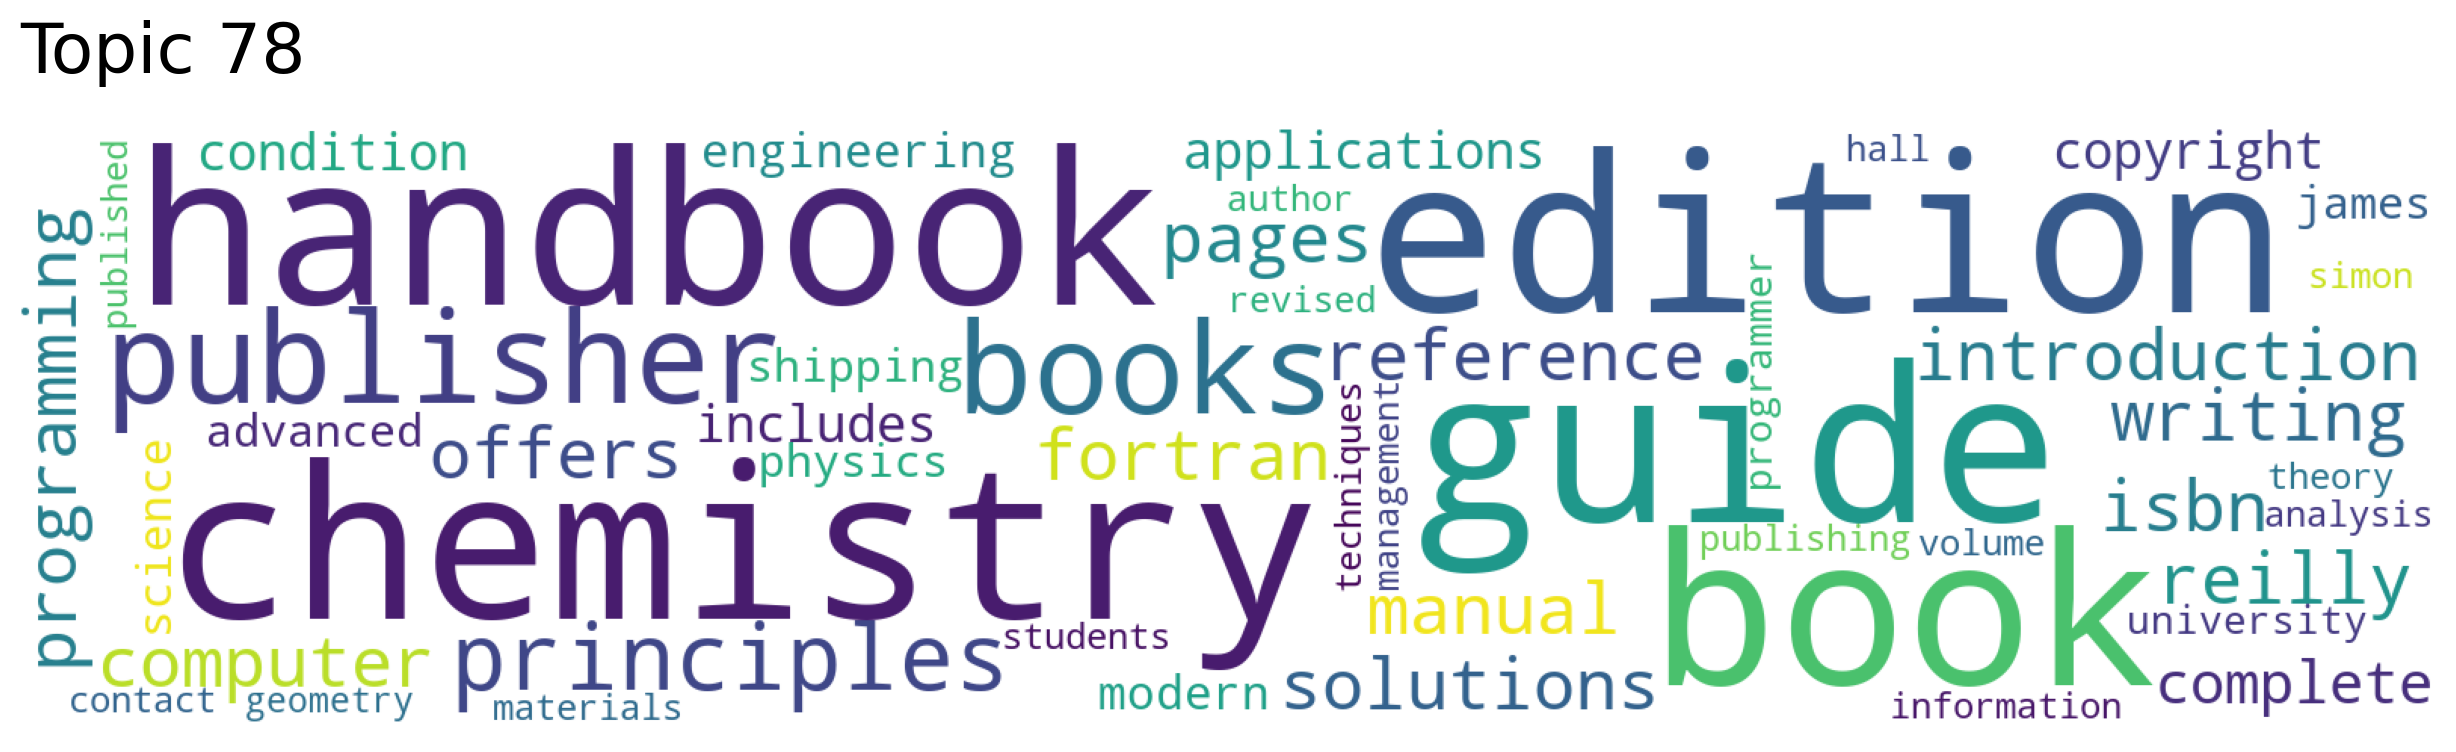

In [14]:
topic_words, word_scores, topic_scores, topic_nums = top2vec_model.search_topics(keywords=['medicine'], num_topics=3)
for topic in topic_nums:
    top2vec_model.generate_topic_wordcloud(topic, background_color='white')

## Search

In [15]:
documents, document_scores, document_ids = top2vec_model.search_documents_by_topic(topic_num=48, num_docs=5)

In [16]:
documents, document_scores, document_ids = top2vec_model.search_documents_by_topic(topic_num=48, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print(doc)
    print('\n')

Document: 1965, Score: 0.8345683813095093

No, but some OS's ( COHERENT , etc ) are able to drive one of the ports in
polled mode without using the IRQ. In your example, after accessing the
modem, the mouse won't work until you reboot, because the IRQ is used by
the modem.


Yes, you can change the IRQ's for com3/4, but it depends on your other
hardware. com1 uses IRQ4, com2 IRQ3.  If you have only one printerport 
( IRQ7 ), you can change com3 to IRQ5 ( normally 2nd printer ). For com4,
you can assign IRQ2, if its free. As far as I know, no other IRQ can be
used until your I/O-card is 16bit and caould access IRQ's > 8.

Michael


Document: 9234, Score: 0.810209333896637
] Hi there,
] 
] 
] : 	I have 1s/1p/1g  I/O card in my 386/40 PC. 
] : When I plug in wang modem at com4,it works. If I change
] : it to com1- it doesn't. 
] : Program "chkport" gives diagnostics like "possible com /irq
] : conflict at com1" (with mouse driver in memory).
] 
] Since your IO-card only has one serial por

In [18]:
documents, document_scores, document_ids = top2vec_model.search_documents_by_keywords(keywords=["medicine"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print(doc)
    print('\n')

Document: 451, Score: 0.5337585210800171


Point 1:

I'm beginning to see that *part* of the disagreements about the whole
"yeast issue" is on differing perceptions and on differing meanings
of words.  Medical doctors have a very specific and specialized "jargon",
necessary for precise communication within their field (which I'm fully
cognizant of since I, too, speak "jargonese" when with my peers).  For the
situation in sci.med, many times the words or phrases used by doctors can
have a different and more specific meaning than the same word used in the
world at large, causing significant miscommunication.  One example word,
and very relevant to the yeast discussion, is the exact meaning of "systemic".
It is now obvious to me that the meaning of this word is very specific, much
more so than its meaning to a non-doctor.  There is also the observation of
this newsgroup that both doctors and non-doctors come together on essentially
equal terms, which, when combined with the jargon issue, 

In [19]:
words, word_scores = top2vec_model.similar_words(keywords=['medicine'], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

medical 0.619431961703715
patients 0.5630236274332232
doctors 0.5072413415004565
treatment 0.499438978362722
clinical 0.4763995215242255
patient 0.4647316343955521
disease 0.45638297600895206
england 0.453398740823143
physicians 0.44777976760072175
treatments 0.43896882491436917
placebo 0.4371361912770077
doctor 0.4344153622846164
med 0.4277714565863088
health 0.4269761439162954
scientific 0.4242031434575355
nutrition 0.4236242644897541
physician 0.42016369981297097
alternative 0.41132023787754646
therapy 0.4081072684516456
study 0.4042552435169986


# BERTopic
* https://github.com/MaartenGr/BERTopic
* Uses Transformer and cTF-IDF to generate custers
  * Internally based on sentence-transformers
    * BERTopic(embedding_model='xlm-r-bert-base-nli-stsb-mean-tokens')
    * See sBERT for support
  * Support multi-lingual embeddedings 
    * BERTopic(language='German')
    * BERTopic(language='multilingual')
  * cTF-IDF (https://maartengr.github.io/BERTopic/api/ctfidf.html)
    * TF-IDF adopted for multiple classes
    * Joins all documents per class (rather than multiple documents)
    * This gives us a measure of word importance in each cluster
* Clusters make easy to interpret topics
  * Can reduce the number of topics during training (if too fine-grained)
    * BERTopic(nr_topics=10) - Forced
    * BERTopic(nr_topics='auto') - Reduce min_similarity = 0.9 using cosine
  * Can reduce after training
  * new_topics, new_probs = model.reduce_topics(docs, topics, probs, nr_topics=10)
* Topics represented by set of words
  * BERTopic extracts words using class based TF-IDF
  * Can update the topics generated with different settings
    * model.update_topics(docs, topics, n_gram_range=(1, 3), stop_words='english')
  * Can use a CountVectprozer
    * cv = CountVectorizer(ngram_range=(1, 3), stop_words="english")
    * model.update_topics(docs, topics, vectorizer=cv)
* Others
  * Can accept a Tfidf Vectorizer (instead of Transformer)
  * Save and Load support


## Fit 
* Note Topic -1 is noise
* UMAP is random, and can change topics between runs

In [20]:
%%time
topic_model = BERTopic(calculate_probabilities=True)
topics, probs = topic_model.fit_transform(docs)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [21]:
topic_model.get_topic_info()

Topic  Count                                    Name
0       -1   6471                        -1_to_the_is_and
1        0   1839                    0_game_team_games_he
2        1    581           1_key_clipper_chip_encryption
3        2    527                    2_ites_cheek_yep_huh
4        3    474              3_israel_israeli_jews_arab
..     ...    ...                                     ...
218    217     10               217_phone_onhook_tip_ring
219    218     10          218_saturn_dealer_profit_price
220    219     10          219_radiosity_stage_stephan_65
221    220     10  220_8051_assembler_signetics_simulator
222    221     10                 221_amd_486_intel_chips

[223 rows x 3 columns]

In [22]:
topic_model.get_topic(2)

[('ites', 0.5844485528042155),
 ('cheek', 0.544490971589683),
 ('yep', 0.4042686373258479),
 ('huh', 0.3632757776093236),
 ('ken', 0.33533417451259345),
 ('ignore', 0.3191317879477847),
 ('forget', 0.2768230956672458),
 ('art', 0.2727890392121458),
 ('why', 0.2478440258139494),
 ('lets', 0.2236683976702068)]

## Visualize

### Topic Distance
* Visualization to review and understand extracted topics
* Distance may be helpful in looking at similarity of particular topics

In [23]:
topic_model.visualize_topics()

### Topic Probability 
* Probabilities returned from transform / fit_transform
* Helps express confidence by BERTopic that a particular topic can be identified in a document.

In [29]:
topic_model.visualize_distribution(probs[0])

In [30]:
topic_model.visualize_distribution(probs[1])

### Top Topic Words
* Visualize c-TF-IDF scores for top ranking words in each topic
* Relative c-TF-IDF scores between and within topics can be useful

In [31]:
topic_model.visualize_barchart()

### Topic Similarity
* Given topic embeddings and c-TF-IDF 
* Generate similarity matrix by using cosine similarities
* Resulting matrix indicating how similar topics are

In [32]:
topic_model.visualize_heatmap()

### Topic Hierarchy
* The topics are hierarchically clustered
* Library uses scipy.cluster.hierarchy to create clusters 

In [33]:
topic_model.visualize_hierarchy()

### Topic Decline
* Topics are represented by a set of words 
* A word is represented by a sorted c-TF-IDF score
* Higher the score, the more representative a word to the topic
* Topic words scores decline with each word that is added
* There is diminishing returns to adding additional words (i.e. think elbow method)


In [34]:
topic_model.visualize_term_rank()

## Reduce Topics


In [35]:
number = len(topic_model.topics)
new_topics, new_probs = topic_model.reduce_topics(docs, topics, probs, nr_topics=number // 2)

In [36]:
topic_model.visualize_heatmap()

## Search

In [37]:
similar_topics, similarity = topic_model.find_topics("vehicle", top_n=5)
similar_topics

[9, 21, 10, 77, 29]

In [38]:
topic_model.get_topic(similar_topics[0])

[('car', 0.027342942241968357),
 ('cars', 0.01725751902643484),
 ('engine', 0.014341727679655943),
 ('ford', 0.011750956536523622),
 ('mustang', 0.01165135917597401),
 ('the', 0.009708417829243721),
 ('it', 0.008874847567256875),
 ('v8', 0.00868677712194226),
 ('with', 0.007442774977255936),
 ('and', 0.007400743600414021)]

# CTM - Contextualized Topic Models
* Cross-lingual Contextualized Topic Models with Zero-shot Learning
  * Bag-of-words limitations in multi-lingual topics challenges
    * Requires large sparse vocabulary
    * Topic model in one language 
  * CTM addresses these issues
    * Find topics in one language
    * Transfer learn to other language 
  * Results show stable coherent topics
* https://arxiv.org/pdf/2004.07737
* https://github.com/MilaNLProc/contextualized-topic-models#tldr
* https://colab.research.google.com/drive/1fXJjr_rwqvpp1IdNQ4dxqN4Dp88cxO97?usp=sharing\



# Evaluating Topic Models
* Evaluating LDA https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0
* Reading Tea Leaves: How Humans Interpret Topic Models
https://papers.nips.cc/paper/2009/file/f92586a25bb3145facd64ab20fd554ff-Paper.pdf
  * Coherence and Perplexity aren't perfect
  * Word Intrusion Task
    * Take top 5 words per topic
    * Inject the lowest probability word
    * Human reviewer pick word that doesn't apply
  * Topic Intrusion Task
    * Provide abstract
    * Show three high probability and one random topic
    * Human reviewer pick least applicable topic